In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#a importação de um conjunto de dados
df = pd.read_csv('C:/Users/sannd/OneDrive/Área de Trabalho/SENAI/2SEMESTRE/IA/dados_produtos.csv',sep =',')

In [22]:
#definindo o tamnho do nosso conjunto de dados e listando ele
df.tail(100)
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [23]:
#criando dicionario para renomear as colunas
dic_colunas={
    'product_name':'Nome do Produto','rating': 'Média','rating_count':'Número de Avaliações',
    'purchased':'comprou'
}
#renomeando as colunas
df = df.rename(dic_colunas, axis =1)


In [24]:
df.head()

,Nome do Produto,Média,Número de Avaliações,comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [25]:
#definindo as variavéis para serem utilizadas no boxplot
notas = df['Média']
produtos = df['Nome do Produto']


Text(0.5, 0, 'product_name')

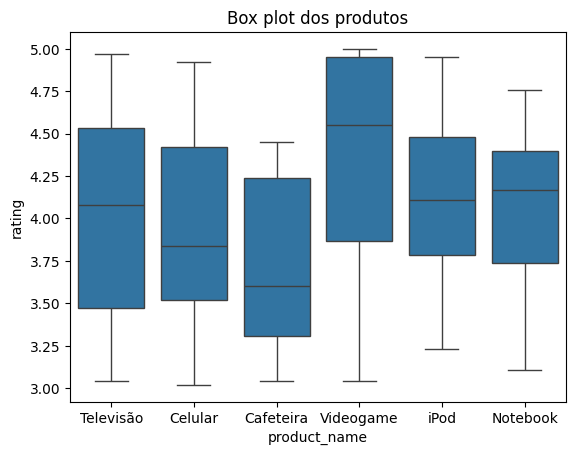

In [26]:
#mostrando o boxplot do nosso conjunto de dados
sns.boxplot(x = produtos, y = notas)
plt.title('Box plot dos produtos')
plt.ylabel('rating')
plt.xlabel('product_name')

In [27]:
#verificando as informações sobre as colunos do conjunto de dados e alguns informações, como total, media, desvio padrao, quartis, max e min
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nome do Produto       100 non-null    object 
 1   Média                 100 non-null    float64
 2   Número de Avaliações  100 non-null    int64  
 3   comprou               100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


,Média,Número de Avaliações,comprou
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [28]:
#pré processamento
#verificando se há valores nulos nas colunas de dados
print(f"Total de valores nulos: {df['Média'].isnull().sum()}")
print(f"Total de valores nulos: {df['Número de Avaliações'].isnull().sum()}")

Total de valores nulos: 0
Total de valores nulos: 0


In [29]:
#substituição dos valores binários para texto, para ser utilizado na arvore de decisão
df['comprou']=df['comprou'].replace(1, 'Comprou')
df['comprou']=df['comprou'].replace(0, 'Não Comprou')


In [30]:
df.head(100)

,Nome do Produto,Média,Número de Avaliações,comprou
0,Televisão,3.04,29,Comprou
1,Celular,3.46,3872,Não Comprou
2,Cafeteira,3.25,1187,Não Comprou
3,Televisão,3.77,4097,Comprou
4,Videogame,5.00,4738,Comprou
...,...,...,...,...
95,iPod,4.44,1372,Não Comprou
96,Celular,4.66,1690,Comprou
97,Televisão,4.33,3364,Comprou
98,Notebook,3.30,1825,Comprou


In [31]:
#criando as variáveis para dividir o conjunto de dados e utilziando para o treinamendo da arvore de decisão
X =  np.array(df[['Média', 'Número de Avaliações']])
y = np.array(df.comprou)

X.reshape(-1,1)
y.reshape(-1,1)

array([['Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Não Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       ['Comprou'],
       [

In [32]:
notas = np.array(df['Média'])

In [33]:
#criando nosso treinamento e salvando em variáveis para serem criadas as arvores de decisões com cada eletrônico
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y,test_size=0.3,random_state=42)                                                                      

In [34]:
#criando cada arvore de decisão e passando os parÂmetros criados a partir do treinamento
modeloTelevisao = DecisionTreeClassifier()
modeloCelular = DecisionTreeClassifier()
modeloCafeteira = DecisionTreeClassifier()
modeloVideoGame = DecisionTreeClassifier()
modeloNotebook = DecisionTreeClassifier()
modeloiPod = DecisionTreeClassifier()

modeloTelevisao.fit(x_treino, y_treino)
modeloCelular.fit(x_treino, y_treino)
modeloCafeteira.fit(x_treino, y_treino)
modeloVideoGame.fit(x_treino, y_treino)
modeloNotebook.fit(x_treino, y_treino)
modeloiPod.fit(x_treino, y_treino)



DecisionTreeClassifier()

In [35]:
#criando as previsões, que são os resultados da arvore 
previsoesTelevisao = modeloTelevisao.predict(x_teste)
previsoesCelular = modeloCelular.predict(x_teste)
previsoesCafeteira = modeloCafeteira.predict(x_teste)
previsoesVideoGame = modeloVideoGame.predict(x_teste)
previsoesNotebook = modeloNotebook.predict(x_teste)
previsoesiPod = modeloiPod.predict(x_teste)

In [36]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [38]:
#criando as avaliações da arvore de decisão de cada eletrônico
precisaoTelevisao = accuracy_score(y_teste, previsoesTelevisao)
precisaoCelular= accuracy_score(y_teste, previsoesCelular)
precisaoCafeteira = accuracy_score(y_teste, previsoesCafeteira)
precisaoVideoGame = accuracy_score(y_teste, previsoesVideoGame)
precisaoNotebook = accuracy_score(y_teste, previsoesNotebook)
precisaoiPod = accuracy_score(y_teste, previsoesiPod)

f1Televisao = f1_score(previsoesTelevisao, y_teste, pos_label='Comprou')
f1Celular = f1_score(previsoesCelular, y_teste, pos_label='Comprou')
f1Cafeteira = f1_score(previsoesCafeteira, y_teste, pos_label='Comprou')
f1VideoGame = f1_score(previsoesVideoGame, y_teste, pos_label='Comprou')
f1Notebook = f1_score(previsoesNotebook, y_teste, pos_label='Comprou')
f1iPod = f1_score(previsoesiPod, y_teste, pos_label='Comprou')

recallTelevisao = recall_score(previsoesTelevisao, y_teste, pos_label='Comprou')
recallCelular = recall_score(previsoesCelular, y_teste, pos_label='Comprou')
recallCafeteira = recall_score(previsoesCafeteira, y_teste, pos_label='Comprou')
recallVideGame = recall_score(previsoesVideoGame, y_teste, pos_label='Comprou')
recallNotebook = recall_score(previsoesNotebook, y_teste, pos_label='Comprou')
recalliPode = recall_score(previsoesiPod, y_teste, pos_label='Comprou')




In [39]:
print(f'Precisão do modelo de Televisão: {precisaoTelevisao}')
print(f'Precisão do modelo de Celular: {precisaoCelular}')
print(f'Precisão do modelo de Cafeteira: {precisaoCafeteira}')
print(f'Precisão do modelo de VideoGame: {precisaoVideoGame}')
print(f'Precisão do modelo de Notebook: {precisaoNotebook}')
print(f'Precisão do modelo de iPod: {precisaoiPod}')

print("-----------------------------------")

print(f'Métrica f1 score Televisão: {f1Televisao}')
print(f'Métrica f1 score Celular: {f1Celular}')
print(f'Métrica f1 score Cafeteira: {f1Cafeteira}')
print(f'Métrica f1 score VideoGame: {f1VideoGame}')
print(f'Métrica f1 score Notebook: {f1Notebook}')
print(f'Métrica f1 score iPod: {f1iPod}')

print("-----------------------------------")

print(f'Métrica recall score Televisão {recallTelevisao}')
print(f'Métrica recall score Celular {recallCelular}')
print(f'Métrica recall score Cafeteira {recallCafeteira}')
print(f'Métrica recall score VideoGame {recallVideGame}')
print(f'Métrica recall score Notebook {recallNotebook}')
print(f'Métrica recall score iPod {recalliPode}')


Precisão do modelo de Televisão: 0.43333333333333335
Precisão do modelo de Celular: 0.43333333333333335
Precisão do modelo de Cafeteira: 0.43333333333333335
Precisão do modelo de VideoGame: 0.5
Precisão do modelo de Notebook: 0.43333333333333335
Precisão do modelo de iPod: 0.4666666666666667
-----------------------------------
Métrica f1 score Televisão: 0.4848484848484849
Métrica f1 score Celular: 0.4848484848484849
Métrica f1 score Cafeteira: 0.4848484848484849
Métrica f1 score VideoGame: 0.5714285714285714
Métrica f1 score Notebook: 0.4848484848484849
Métrica f1 score iPod: 0.5294117647058824
-----------------------------------
Métrica recall score Televisão 0.6666666666666666
Métrica recall score Celular 0.6666666666666666
Métrica recall score Cafeteira 0.6666666666666666
Métrica recall score VideoGame 0.7142857142857143
Métrica recall score Notebook 0.6666666666666666
Métrica recall score iPod 0.6923076923076923


In [41]:
#criando um função para salvar cada arvore em uma imagem. 
def salvar_arvore(classificador_arvore_decisao,nome):
    plt.figure(figsize=(200,100))
    tree.plot_tree(classificador_arvore_decisao,feature_names= notas.tolist(), class_names = y.tolist(), filled= True)
    plt.savefig(nome)    
    plt.close()

In [ ]:
#salvando cada arvore.
salvar_arvore(modeloTelevisao, "arvore_tv.png")
salvar_arvore(modeloCelular, "arvore_celular.png")
salvar_arvore(modeloCafeteira, "arvore_cafeteira.png")
salvar_arvore(modeloVideoGame, "arvore_video.png")
salvar_arvore(modeloNotebook, "arvore_notebook.png")
salvar_arvore(modeloiPod, "arvore_ipod.png")